In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [188]:
train_data = pd.read_csv('./data/train_in.csv', header=None)
train_label = pd.read_csv('./data/train_out.csv', header=None)
train_data.shape


(1707, 256)

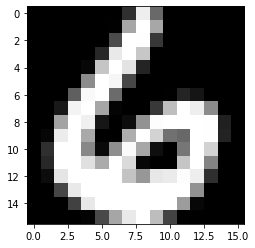

In [189]:
first_image = train_data.iloc[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((16, 16))
plt.imshow(pixels, cmap='gray')
plt.show()

In [190]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [191]:
labels_array = train_label.values.flatten()
images_array = train_data.values

defaultdict(<class 'int'>, {6: 151, 5: 88, 4: 122, 7: 166, 3: 131, 1: 252, 0: 319, 8: 144, 2: 202, 9: 132})


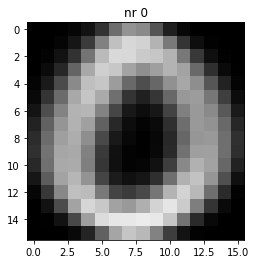

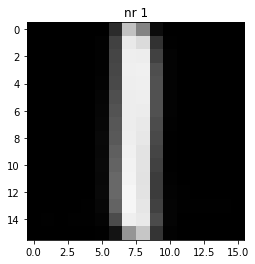

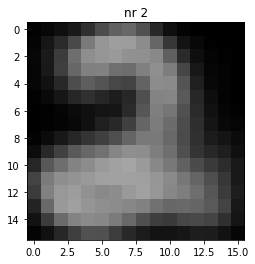

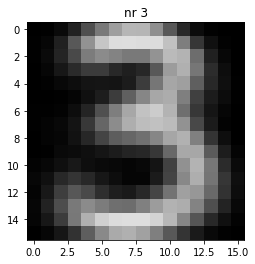

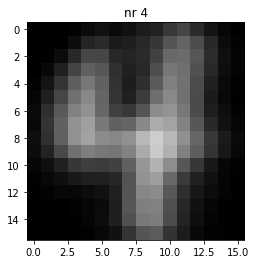

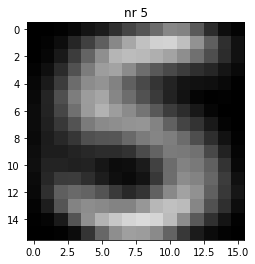

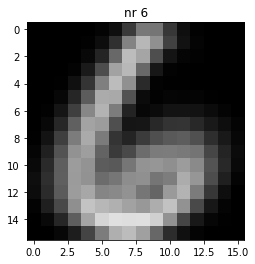

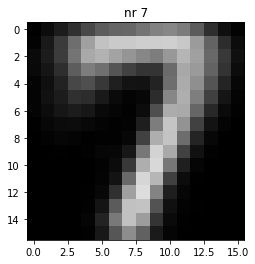

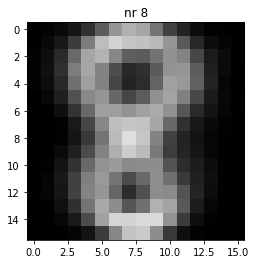

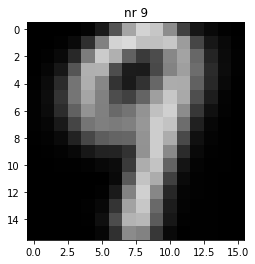

In [192]:
from functools import partial

dist = defaultdict(partial(np.ndarray, 0))
label_counter = defaultdict(int)


for i in range(10):
    dist[i] = np.zeros(256)




counter = 0
for image, label in zip(images_array, labels_array):
    dist[label] += image
    label_counter[label] += 1

    #label_counter[label] += image

print(label_counter)

for label, image_sum in dist.items():
    dist[label] = dist[label] / label_counter[label]
    image = np.array(dist[label], dtype='float')
    pixels = image.reshape((16, 16))
    plt.imshow(pixels, cmap='gray', vmin=-1, vmax=1)
    plt.title("nr " + str(label))
    plt.show()





In [193]:
def distance(image1, image2):
    assert len(image1) == len(image2)
    return np.sum((image1 - image2)**2)

In [205]:
distCloud = []

for first_label in range(10):
    temp = []
    for second_label in range(first_label + 1, 10):
        diff = distance(dist[first_label], dist[second_label])
        temp.append(round(diff,2))
    if len(temp) > 0:
        distCloud.append(temp)

print('\n'.join([' |  '.join(['{:4}'.format(item) for item in row]) 
      for row in distCloud]))        

208.79 |  87.13 |  83.61 |  115.99 |  56.54 |  66.49 |  140.77 |  98.17 |  131.99
102.52 |  137.67 |  103.51 |  123.63 |  112.67 |  115.42 |  101.74 |  98.65
66.88 |  62.93 |  62.52 |  53.76 |  78.72 |  50.09 |  78.99
82.58 |  37.44 |  86.53 |  79.61 |  49.29 |  69.8
64.02 |  77.13 |  57.5 |  54.48 |  36.13
44.87 |  84.86 |  48.54 |  68.2
118.55 |  73.74 |  108.99
71.7 |  29.45
40.97


In [195]:
test_data = pd.read_csv('./data/test_in.csv', header=None)
test_label = pd.read_csv('./data/test_out.csv', header=None)


labels_array_test = test_label.values.flatten()
images_array_test = test_data.values


In [196]:

counter = 0

for img, true_label in zip(images_array_test, labels_array_test):
    current_dist = float('inf')
    currently_guessed = 0
    for label, image in dist.items():
        c = distance(img, image)
        if current_dist > c:
            target_label = label
            current_dist = c
    
    if target_label == true_label:
        counter += 1

print("accuracy: " + str(100 * counter / len(labels_array_test)) + "%")

accuracy: 80.4%


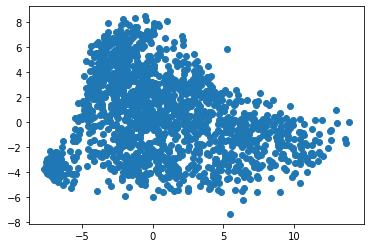

In [212]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(images_array)
trans_pca_r = pca.transform(images_array)

xs = [p[0] for p in trans_pca_r]
ys = [p[1] for p in trans_pca_r]

plt.scatter(xs, ys)
plt.show()

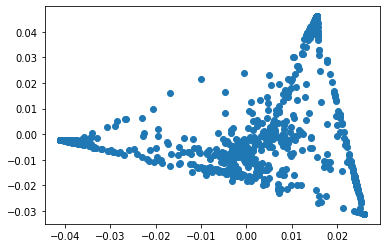

In [217]:
from sklearn.manifold import LocallyLinearEmbedding


embedding = LocallyLinearEmbedding(n_components=2)
X_transformed = embedding.fit_transform(images_array)

xs = [p[0] for p in X_transformed]
ys = [p[1] for p in X_transformed]

plt.scatter(xs, ys)
plt.show()


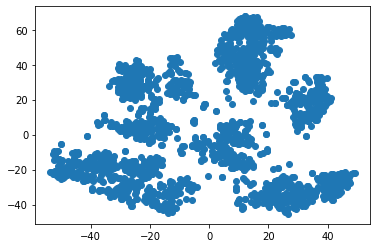

In [218]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(images_array)

xs = [p[0] for p in X_embedded]
ys = [p[1] for p in X_embedded]

plt.scatter(xs, ys)
plt.show()
